**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**
- Считаем файл /datasets/games.csv
- Подготовим и предобработаем данные
- Проведем исследовательский анализ данных
- Составим портрет пользователя каждого региона
- Проверим гипотезы
- Напишем общий вывод

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [2]:
#Считаем файл и посмотрим на таблицу
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#Оценим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Посмотрим общее количество проупсков по каждому из столбцов
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#Проверим таблицу на наличие дубликатов
data.duplicated().sum()

0

In [6]:
# Создание функции для вывода уникальных значений по каждому столбцу. Проверка неявных дубликатов
def uniq(data): 
    for column in data.columns:
        print('Уникальные значения столбца', column)
        print(data[column].unique())
        print('Количество NAN столбца', column)
        print(data[column].isna().sum())
        
uniq(data)

Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Количество NAN столбца Name
2
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Количество NAN столбца Platform
0
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Количество NAN столбца Year_of_Release
269
Уникальные значения столбца Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Количество NAN столбца Genre
2
Уникальные значения с

**Вывод:** Считали файл и просмотрели общую информацию:
- в шести столбцах имеются пропущенные значения
- названия столбцов необходимо привести к нижнему регистру
- заменить типа данных столбцов Year_of_Release на int
- столбец User_Score необходимо преобразовать из object и определить значение аббревиатуры "int"
- дубликаты отсутствуют 

**Шаг 2. Подготовьте данные**

In [7]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#Преобразуем данные в необходимые типы
data['year_of_release'] = pd.array(data['year_of_release'], dtype = pd.Int64Dtype())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Остальные данные пока оставим в тех типах, как есть

In [9]:
#Обработаем пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- Столбцы name и genre имеют по 2 пропуска - слишком маленькое количество, поэтому можем просто удалить. Причинами пропусков могут быть небольшие технические проблемы или неаккуратность при выгрузке данных
- Столбец year_of_release имеет 269 пропусков - так как здесь идет распределение по годам выпуска, то заменять на среднее значение или медиану нельзя, иначе мы просто можем указать неверный год выпуска для 269 игр, а это может плохо повлиять на дальнейшее исследование, поэтому есть вариант проверить выпуск этих игр на других платформах и заменить пропуски на схожие значения.
- Столбцы critic_score, user_score и rating - это оценочные показатели и мы также не можем заменить их средним значением или медианой, так как для каждой игры были выставлены индивидуальные оценки, поэтому просто оставим как есть

**Причины, которые могли привести к пропускам** - Технологические, которые возникают во время копирования, считывания или записи данных, изменения формата файла. Вызванные человеческим фактором, так как люди могут ошибаться.  

Значение "tbd" в столбце user_score скорее всего расшифровывается как "to be defined" и означает, что игра еще не оценена достаточным количеством пользователей. А значит это отсутствие оценки и мы можем заменить пропуски на nan, а тип данных на float.

In [10]:
#Удалим пропуски в столбцах name и genre
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


In [17]:
#Заполним пропуски в столбце user_score и заменим тип данных на float
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [18]:
#Посмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [19]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод**
В ходе предобработки данных мы:
- Привели названия столбцов к нижнему регистру
- Удалили пропуски в столбцах name и genre 
- Преобразовали данные столбца year_of_release к типу int и сократили количество пропусков вдвое
- Преобразовали данные столбца user_score к типу float и обработали пропуски
- Посчитали и Добавили суммарные продажи во всех регионах в отдельный столбец

In [21]:
#в рейтинге заменим пропуски на "замену-заглушку"
data['rating'] = data['rating'].fillna('without')

**Шаг 3. Проведите исследовательский анализ данных**

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

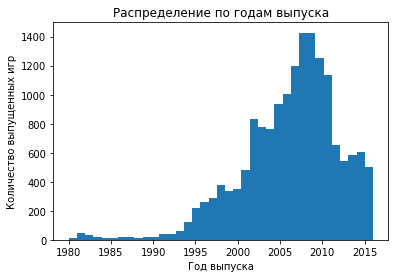

In [22]:
data['year_of_release'].plot(kind = 'hist', bins=37)
plt.title('Распределение по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

**Вывод:** 
мы можем сделать вывод, что с 1980 года по 1993 сфера особо не развивалась, но после 1995 года сфера начала стабильно набирать обороты, возможно были введены новые технологии или принципы. При анализе данных важны лишь последние года, поэтому периоды до 2010 не важны.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [23]:
#построим сводную таблицу 
data_platforms_sales =data.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
data_platforms_sales.sort_values(('sum', 'total_sales'),ascending = False)


,sum
,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14


Как мы видим, платформами с наибольшими суммарными продажами являются первые 6 платформ, PS2, X360, PS3, Wii, DS, PS.

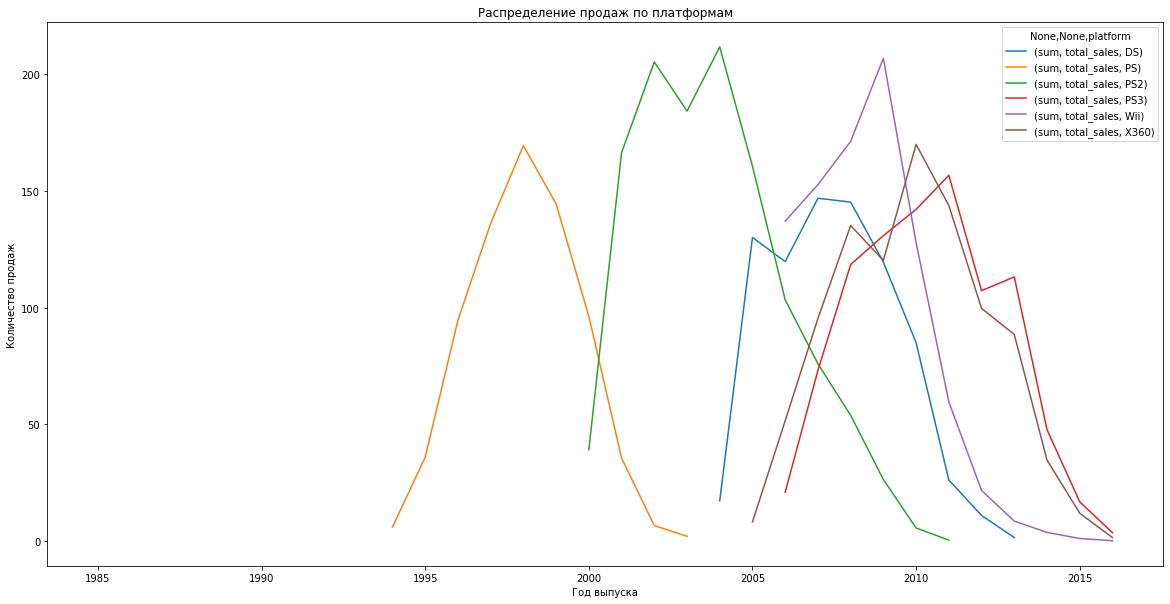

In [24]:
#Построим распределение по годам
data_top_platform = data.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')

data_top_platforms_years =data_top_platform.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
data_top_platforms_years.plot(figsize = (20,10))
plt.title('Распределение продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж')
plt.show()

**Вывод:** Исходя из графика и кода - определили, что период жизни платформ в среднем составляет 7 лет. Это период за который платформа появляется, растет, достигает пикового значени, идёт на спад и умирает, при выходе новой платформы.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.**

Введём актуальный период данных для нашего прогноза на 2017 год. На графике выше, можно определить время жизни платформы. Это ориентировочно 10 лет. По графику самый доходные платформы к 2015 году идут к своему "закату". А нам нужны платформы, которые начинают расти, находятся на пике, либо близки к уходу, но ещё действующие. Я считаю актуальный периодом нужно определить 5 лет. То есть далее мы будем работать с данными за последние 5 лет (с 2012 года)

In [26]:
#сохраним актуальную таблицу и далее будем работать с ней
actual_data = data.query('year_of_release >= 2012')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,without,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [27]:
#Посмотрим на платформы, которые у нас остались в актуальной таблице
actual_data['platform'].unique()

#Посмотрим на продажи по этим платформам
actual_platforms_sales =actual_data.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
actual_platforms_sales.sort_values(('sum', 'total_sales'),ascending = False)

,sum
,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18


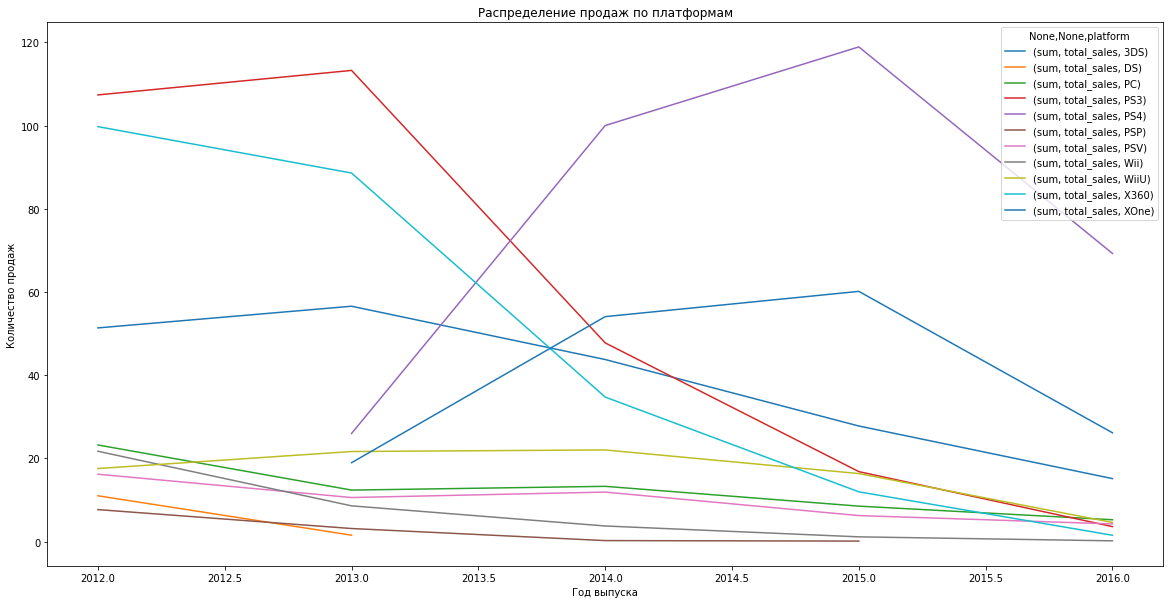

In [28]:
#Посмотрим на все оставшиеся платформы
data_top_platforms_actual =actual_data.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc = ['sum'])
data_top_platforms_actual.plot(figsize = (20,10))
plt.title('Распределение продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж')
plt.show()

**Вывод:** Большинство платформ отмирают, кроме PS4 и XOne - их можно назвать потенциально прибыльными.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

Text(0, 0.5, 'Глобальные продажи')

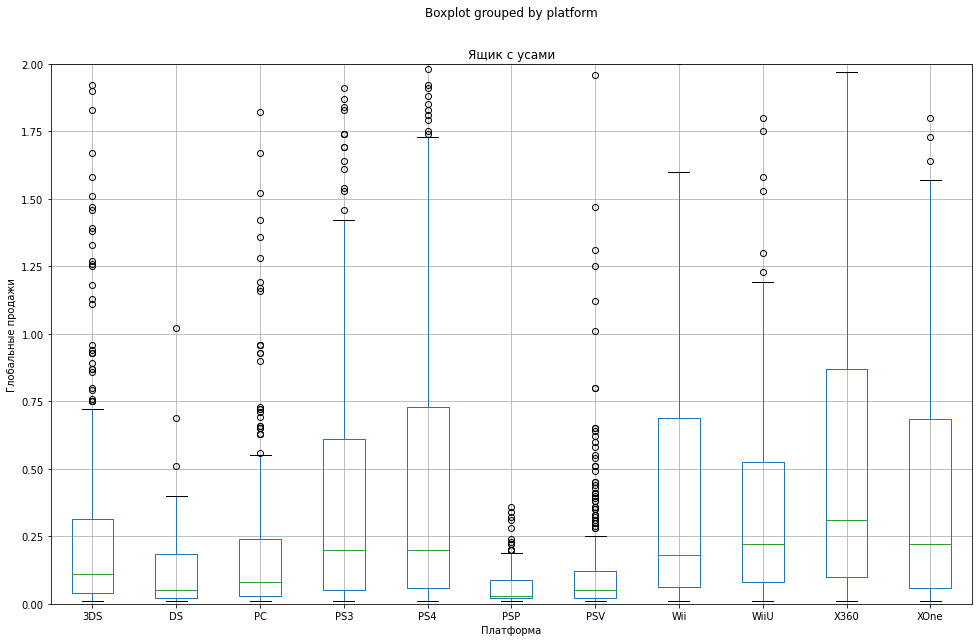

In [29]:
actual_data.boxplot(column = ['total_sales'],by = ['platform'],figsize=(16, 10))
plt.ylim([0, 2])
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

**Вывод:** По всем платформам медианы продаж находятся примерно на одном уровне. Немного выше находятся платформы - PS3, PS4, X360, XOne

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

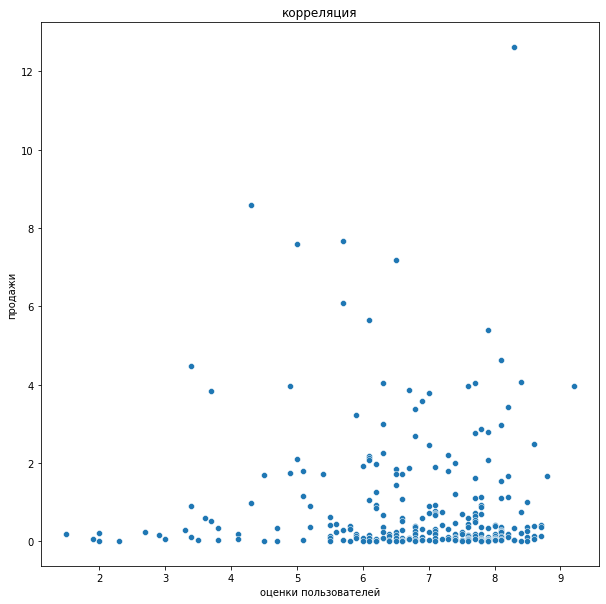

In [30]:
#Возьмем платформу PS4
ps4_data = actual_data.query('platform == "PS4"')
ps4_dfata= ps4_data.sort_values('user_score',ascending = False)

#посмотрим диаграммы рассеяния влияния отзывов пользователей на продажи
ps4_user_score = sns.scatterplot(data = ps4_data, x = 'user_score',y = 'total_sales')
ps4_user_score.figure.set_figwidth(10)
ps4_user_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.show()

In [31]:
#посчитаем коэффициент корреляции 
ps4_data['user_score'].corr(ps4_data['total_sales'])

-0.031957110204556376

**Вывод:** корреляция не выявлена, поэтому можем сказать, что оценки пользователей не влияют на продажи

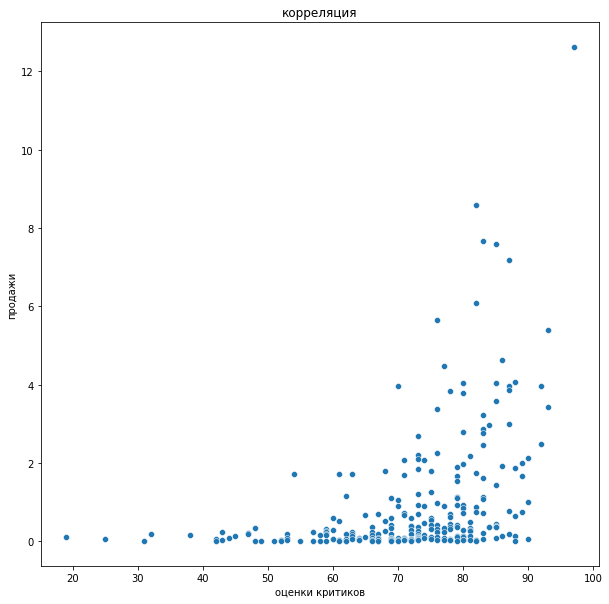

In [32]:
#посмотрим на связь оценок критиков и продажами
ps4_critic_score = sns.scatterplot(data = ps4_data, x = 'critic_score',y = 'total_sales')
ps4_critic_score.figure.set_figwidth(10)
ps4_critic_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки критиков')
plt.ylabel('продажи')
plt.show()

In [33]:
#посчитаем коэффициент корреляции 
ps4_data['critic_score'].corr(ps4_data['total_sales'])

0.40656790206178095

**Вывод:** по сравнению с оценками пользователей - оценки критиков уже гораздо сильнее влияют на продажи, корреляция умеренная.

-0.005143522887113809

0.33149725926295903

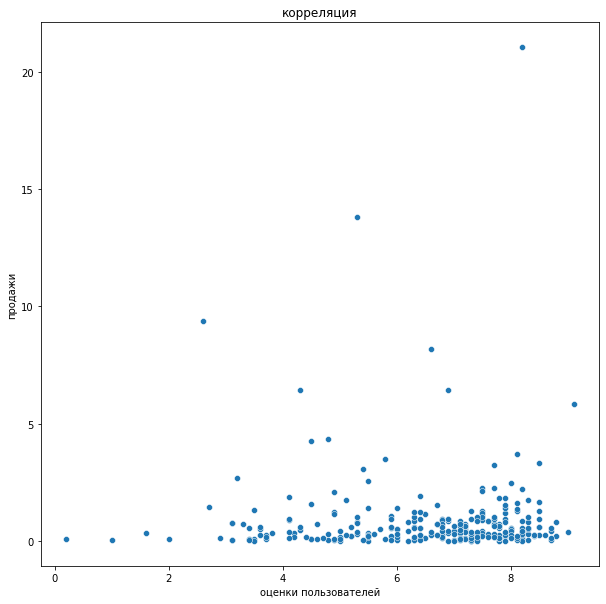

In [34]:
#посчитаем коэффициент корреляции для платформ PS3
ps3_data = actual_data.query('platform == "PS3"')
ps3_data = ps3_data.sort_values('user_score',ascending = False)
display(ps3_data['user_score'].corr(ps3_data['total_sales']))
display(ps3_data['critic_score'].corr(ps3_data['total_sales']))

#посмотрим диаграммы рассеяния
ps3_user_score = sns.scatterplot(data = ps3_data, x = 'user_score',y = 'total_sales')
ps3_user_score.figure.set_figwidth(10)
ps3_user_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.show()

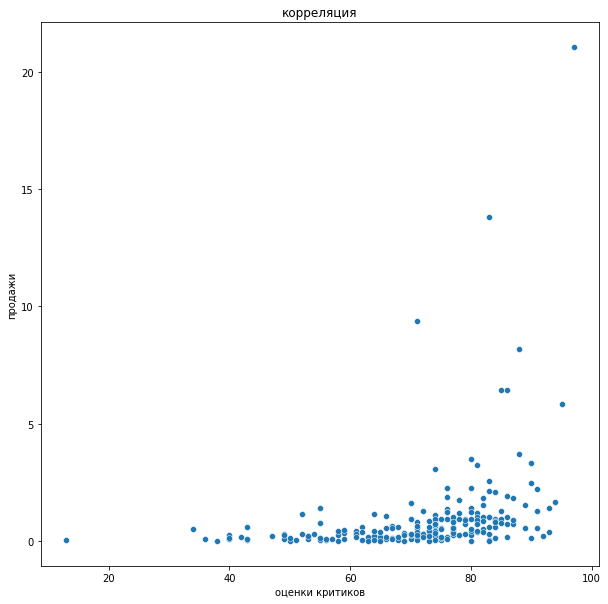

In [35]:
ps3_user_score = sns.scatterplot(data = ps3_data, x = 'critic_score',y = 'total_sales')
ps3_user_score.figure.set_figwidth(10)
ps3_user_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки критиков')
plt.ylabel('продажи')
plt.show()

0.006163978646213355

0.3605734888507335

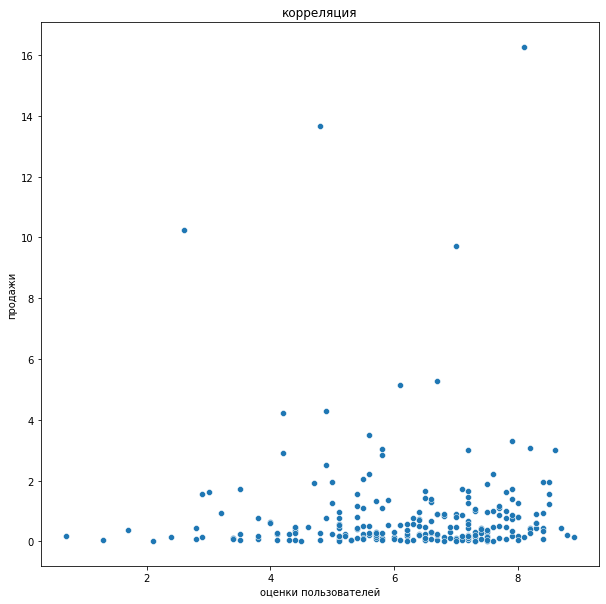

In [36]:
#посчитаем коэффициент корреляции для платформ X360
x360_data = actual_data.query('platform == "X360"')
x360_data = x360_data.sort_values('user_score',ascending = False)
display(x360_data['user_score'].corr(x360_data['total_sales']))
display(x360_data['critic_score'].corr(x360_data['total_sales']))

#посмотрим диаграммы рассеяния 
x360_user_score = sns.scatterplot(data = x360_data, x = 'user_score',y = 'total_sales')
x360_user_score.figure.set_figwidth(10)
x360_user_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.show()

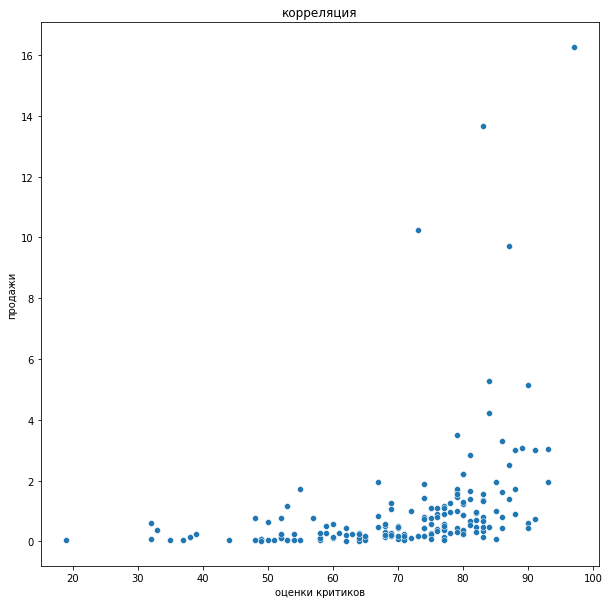

In [37]:
x360_user_score = sns.scatterplot(data = x360_data, x = 'critic_score',y = 'total_sales')
x360_user_score.figure.set_figwidth(10)
x360_user_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки критиков')
plt.ylabel('продажи')
plt.show()

-0.06892505328279423

0.4169983280084016

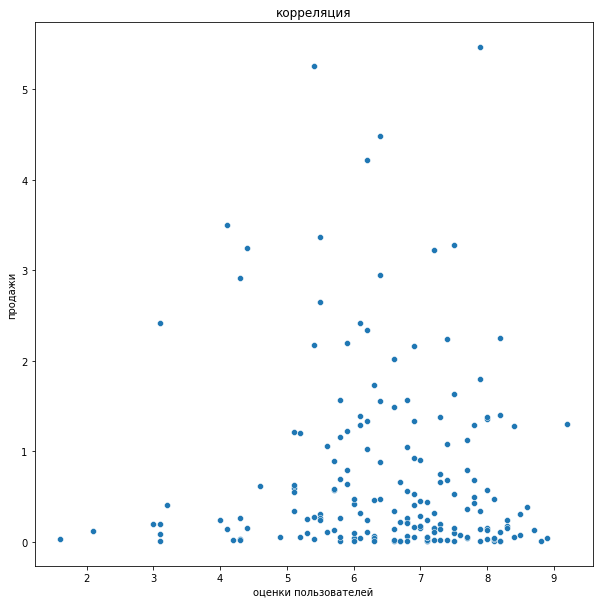

In [38]:
#посчитаем коэффициент корреляции для платформ XOne
xone_data = actual_data.query('platform == "XOne"')
xone_data = xone_data.sort_values('user_score',ascending = False)
display(xone_data['user_score'].corr(xone_data['total_sales']))
display(xone_data['critic_score'].corr(xone_data['total_sales']))

#посмотрим диаграммы рассеяния
xone_user_score = sns.scatterplot(data = xone_data, x = 'user_score',y = 'total_sales')
xone_user_score.figure.set_figwidth(10)
xone_user_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.show()

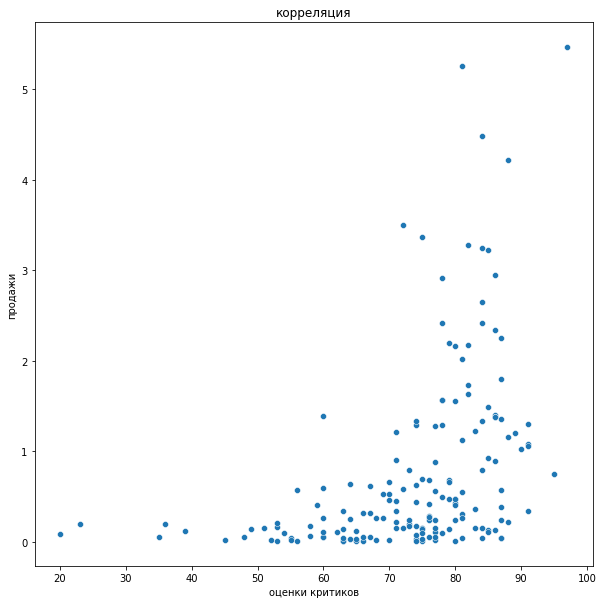

In [39]:
xone_user_score = sns.scatterplot(data = xone_data, x = 'critic_score',y = 'total_sales')
xone_user_score.figure.set_figwidth(10)
xone_user_score.figure.set_figheight(10)
plt.title('корреляция')
plt.xlabel('оценки критиков')
plt.ylabel('продажи')
plt.show()

**Вывод:** мы проверили корреляцию 4х платформ и определили, что оценки пользователей не влияют на продажи, в отличие от оценок критиков, но и с оценками критиков корреляция не сильно большая.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [40]:
genre = actual_data.groupby('genre').agg({'name':'count'}).reset_index()
genre.sort_values(by='name', ascending=False)

,genre,name
0,Action,1031
7,Role-Playing,370
1,Adventure,302
10,Sports,268
8,Shooter,235
3,Misc,192
6,Racing,115
2,Fighting,109
4,Platform,85
9,Simulation,80


**Вывод:** Самым прибыльным жанром является Action, причем с большим отрывом от следующего лидера Misc.

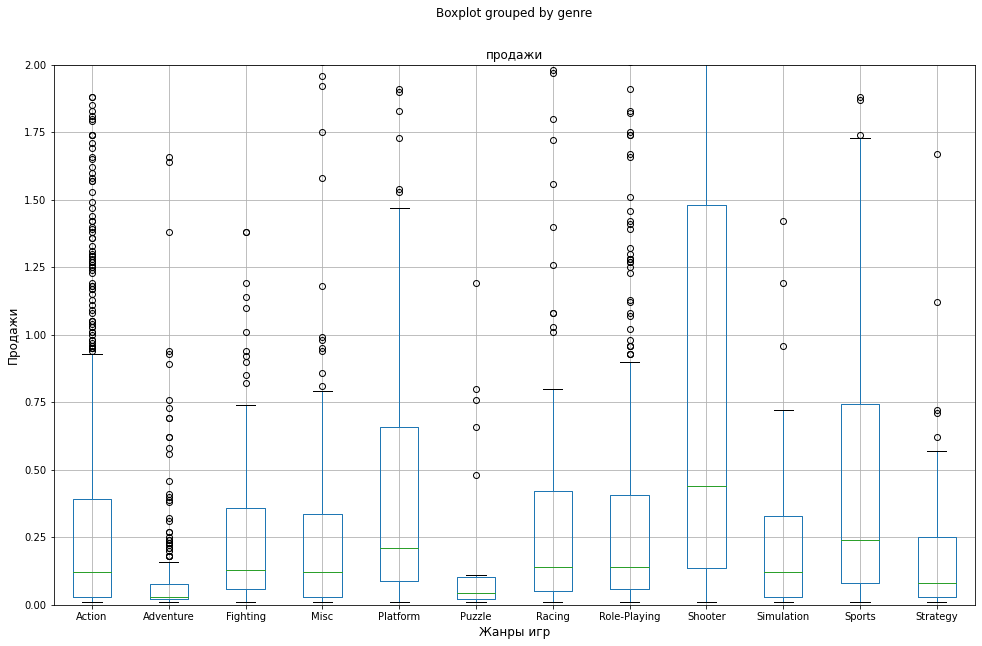

In [41]:
#Построим ящик с усами, чтобы наглядно оценить платформы
actual_data.boxplot(column = ['total_sales'],by = ['genre'],figsize=(16, 10))
plt.ylim([0, 2])
plt.title('продажи')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Вывод:** В прошлой таблице мы определи жанр Action, как самый прибыльный, но теперь видно, что это в основном из-за большого количества выбросов. Однако по медианным значениям, лидирующие позиции занимают жанры Shooter, затем Platform и третье место Sports.

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Самые популярные платформы (топ-5).**

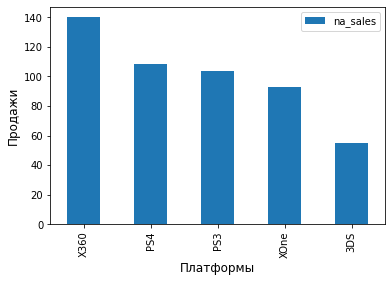

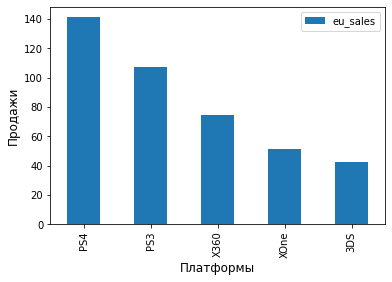

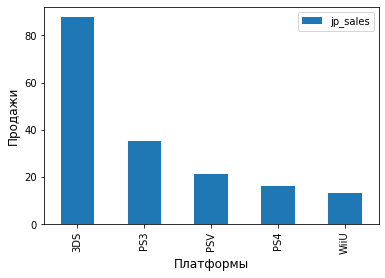

In [42]:
actual_data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
actual_data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
actual_data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Вывод:** Среди пользователей Европы и Северной Америки выявили сходство в предпочтениях, так как платформы X360, PS3, PS4, XOne, 3DS находятся в топ-5 и там и там. В Японии ситуация слегка иная, здесь также пользуются популярность платформы PS3 и PSV, но больше пользователи отдают предпочтений платформе 3DS.

**Самые популярные жанры (топ-5)**

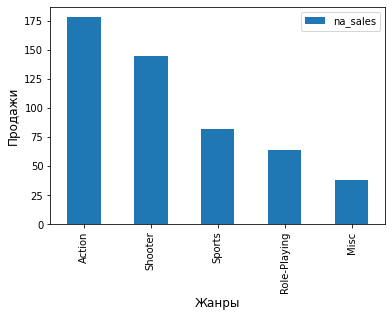

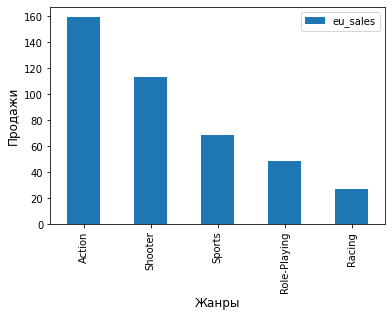

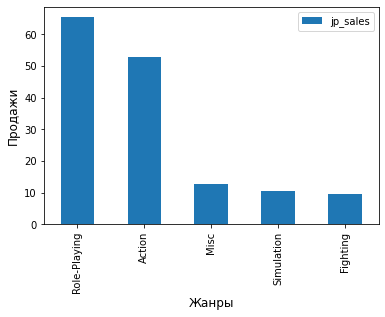

In [43]:
actual_data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
actual_data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
actual_data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Вывод:** Среди пользователей Северной Америки и Европы ситуация почти идентична в плане популярности жанров, на первых местах жанр Action, Shooter и Sports. В Японии ситуация иная, пользователи предпочитают больше жанры Role-PLaying, Action и Misc.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

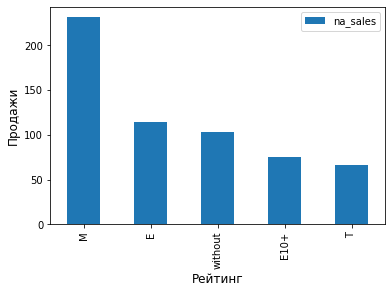

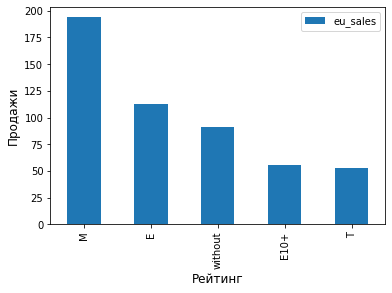

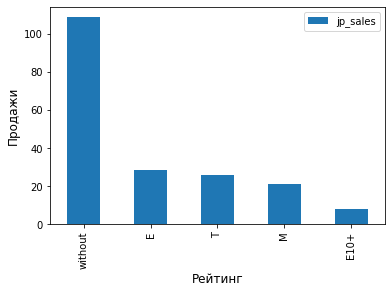

In [44]:
#определим топ-5
actual_data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
actual_data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
actual_data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Вывод:** Среди пользователей Северной Америки и Европы - самый популярный рейтинг М, то есть "для взрослых", далее по популярности рейтинг Е"для всех". В Японии ситуация слегка иная, здесь самый популярный рейтинг Е"для всех" после жанров с заглушкой. Это связано с тем, то система ESRB предназначена для маркировки игр США, Канады и Мексики. 

**Шаг 5. Проверьте гипотезы**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**
- Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC различаются

Так как наши выборки независимы между собой - будем использовать t-критерий Стьюдента

In [46]:
alpha = 0.05
results = st.ttest_ind(actual_data[(actual_data['platform'] == 'XOne') \
                                   & (actual_data['user_score'] > 0)]['user_score'], \
                       actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
- Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные

Так как наши выборки независимы между собой - будем использовать t-критерий Стьюдента

In [47]:
alpha = 0.05
results = st.ttest_ind(actual_data[(actual_data['genre'] == 'Action') \
                                   &(actual_data['user_score'] > 0)]['user_score'], \
                       actual_data[(actual_data['genre'] == 'Sports') &(actual_data['user_score'] > 0)]['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод:** мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

**Общий вывод**

В ходе предобработки данных мы:
- Привели названия столбцов к нижнему регистру
- Удалили пропуски в столбцах name и genre
- Преобразовали данные столбца year_of_release к типу int и сократили количество пропусков вдвое
- Преобразовали данные столбца user_score к типу float и обработали пропуски
- В столбце rating заменили пропуски на 0
- Посчитали и Добавили суммарные продажи во всех регионах в отдельный столбец

В ходе исследования, мы определили, что с 1980 года по 1993 сфера игр и платформ особо не развивалась, но после 1995 года сфера начала стабильно набирать обороты, возможно были введены новые технологии или принципы. Также выяснили, что платформами с наибольшими суммарными продажами являются - PS2, X360, PS3, Wii, DS, PS, а жизненный цикл каждой равен примерно 10ти годам. Самые успешными платформами на период 2016 года являются  PS4 и XOne.

Исследуя зависимость продаж от оценок пользователей и критиков мы выяснили, что оценки пользователей не влияют на продажи, в отличие от оценок критиков, но и с оценками критиков корреляция не сильно большая. Самым прибыльным жанром является Action, но по медианным значениям, лидирующие позиции занимают жанры Shooter, затем Platform и третье место Sports.

Среди пользователей Европы и Северной Америки выявили сходство в предпочтениях - это платформы X360, PS3, PS4, Wii и жанр Action, а самый популярный рейтинг М, то есть "для взрослых". В Японии же больше отдают предпочтения платформе 3DS, а также PS3 и Wii, а жанр больше любят Role-PLaying. 

Также в ходе исследования были проверены 2 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

**Рекомендации для бизнеса:**
- Если хотим успешных продаж в Европе и Америке - выбираем игры в жанре Action, Shooter, Sports с рейтингом М на платформах PS4 или XOne. Если в Японии - игры жанра Role-PLaying с рейтингом Е на платформах 3DS или PS3. Самые перспективные платформы - PS4 и XOne.
- Также стоит учитывать оценки критиков, так как они влияют на продажи, а отличие от оценок пользователей